In [1]:
from sklearn.datasets import load_iris

In [2]:
d=load_iris()

In [3]:
dir(d)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
import pandas as pd

In [11]:
data=pd.DataFrame(d.data,columns=d.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
data["target"]=d.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
data["flower"]=data.target.apply(lambda x:d.target_names[x])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [16]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(data.drop(columns=['target','flower']),data['target'],test_size=0.2,random_state=10)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model=RandomForestClassifier()

In [34]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
model.score(x_test,y_test)

1.0

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm=confusion_matrix(y_test,model.predict(x_test))

In [41]:
import seaborn as sns

In [42]:
import matplotlib.pyplot as plt

<Figure size 720x504 with 0 Axes>

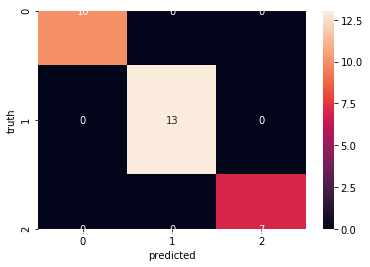

<Figure size 720x504 with 0 Axes>

In [45]:
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.figure(figsize=(10,7))